<a href="https://colab.research.google.com/github/kimdain0222/deep_learning/blob/main/202463004%EA%B9%80%EB%8B%A4%EC%9D%B8_mlp_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
n = 100
d = 2
c = 3

- 특징 2개, class 3개
> - **ex>** 키와 체중 특징 값으로, 과체중/정상체중/저체중으로 분류하는 문제

In [34]:
np.random.seed(42)
X = np.random.randn(n,d)
X[35:70,:] = X[35:70,:] - 2
X[70:,:] = X[70:,:] + 2

In [35]:
t = np.zeros((n,c))
t[:35,0] = 1
t[35:70,1] = 1
t[70:,2] = 1

- `X.shape[0]`: 데이터 샘플의 수 (키와 체중 데이터를 제공한 사람의 인원 수)
- `X.shape[1]`: **특징의 수** (키, 체중) = **input layer node의 수**
- `y.shape[0]`: 데이터 샘플의 수, 반드시 `X.shape[0]`과 동일해야 함
- `y.shape[1]`: 분류하고자 하는 **class의 수** = **output layer node의 수**
- `n`(데이터 샘플의 수) = `100`, `d`(특징의 수) = `2`, `c`(class의 수) = `3` 이므로
> - `X.shape = (100,2)`
> - `t.shape = (100,3)`

In [36]:
print(X.shape, t.shape)

(100, 2) (100, 3)


- `W`와 `b`의 shape

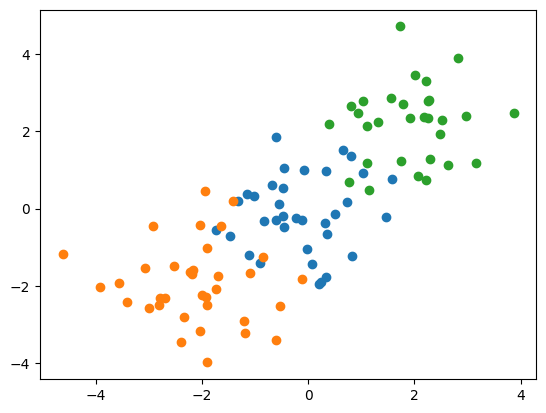

In [37]:
plt.scatter(X[:35,0],X[:35,1])
plt.scatter(X[35:70,0],X[35:70,1])
plt.scatter(X[70:,0],X[70:,1])

- **MLP**의 구조
> - **input layer node의 수**: 2 (= 특징의수 = `X.shape[1]`)
> - **hidden layer node의 수**: 4
> - **output layer node의 수**: 3 (= class의 수 = `t.shape[1]`)

In [38]:
input_node = d
hid1_node = 4
hid2_node = 5
output_node = c

- **가중치 및 편향의 초기값 설정**
- `W.shape` = (**출발 layer node의 수**, **도착 layer node의 수**)
- `b.shape` = (**해당 layer node의 수**,)

In [39]:
# 순방향 가중치
W1 = np.random.randn(input_node,hid1_node)
W2 = np.random.randn(hid1_node,hid2_node)
W3 = np.random.randn(hid2_node,output_node)
b1 = np.random.randn(hid1_node)
b2 = np.random.randn(hid2_node)
b3 = np.random.randn(output_node)
# 역방향 가중치(backpropagation)
# - 역방향 가중치와 순방향 가중치의 관계는 Transpose
W1_b = W1.T
W2_b = W2.T
W3_b = W3.T

In [44]:
print(W1.shape, W1_b.shape, W2.shape, W2_b.shape,W3.shape, W3_b.shape, b1.shape, b2.shape, b3.shape)
# shape 값 각각의 의미를 이해할 수 있어야 함
# 즉, 각 요소의 값은 동일하다 =transepose 관

(2, 4) (4, 2) (4, 5) (5, 4) (5, 3) (3, 5) (4,) (5,) (3,)


- **activation function**: sigmoid

In [ ]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

- **activation function**(sigmoid)의 **미분**

In [ ]:
def d_sigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

- **predict** 함수 정의

In [45]:
def  predict(X,W1,W2,W3,b1,b2,b3):
    a1 = X.dot(W1) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(W2) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(W3) + b3
    y = sigmoid(a3)
    return a1,z1,a2,z2,a3,y

- **Backpropagation**
> - learning rate: 0.1
> - epochs: 1000

In [46]:
eta = 0.1
epochs = 10000
cost = []

In [47]:
for i in range(epochs):
    # 지금 현재까지 업데이트 된 가중치와 편향에 대한 각 node의 값(y포함)
    a1,z1,a2,z2,a3,y = predict(X,W1,W2,W3,b1,b2,b3)
    # 업데이트 된 가중치와 편향에 대한 cost function 값(MSE)
    cost.append(np.mean((t-y)**2))
    # del_out = output layer -> hidden layer
    # del_out.shape = (샘플의 수, output layer node의 수)
    del_out = (y-t) * d_sigmoid(a3)
    # del_hid = hidden layer -> input layer
    # del_hid.shape = (샘플의 수, hidden layer node의 수)
    del_hid2 = del_out.dot(W3_b) * d_sigmoid(a2)
    del_hid1 = del_hid2.dot(W2_b) * d_sigmoid(a1)

    W3_b = W3_b - (eta/n)*del_out.T.dot(z2)
    # W2_b update
    #  - del_out.T.dot(z1)은 W2_b의 각각의 요소를 업데이트 하는 값이므로, W2_b의 shape과 동일해야함 (3,4)
    W2_b = W2_b - (eta/n)*del_hid2.T.dot(z1)
    # /n은 평균을 의미함
    # W1_b update
    #  - del_hid.T.dot(X)는 W1_b의 각각의 요소를 업데이트 하는 값이므로, W1_b의 shape과 동일해야 함 (4,2)
    W1_b = W1_b - (eta/n)*del_hid1.T.dot(X)

    # b update
    # - b의 경우, del_out과 del_hid에 z1과 X가 곱해지는 과정없이 del의 모든 요소 값을 더한 값을 기반으로 업데이트함
    b3 = b3 - (eta/n)*np.sum(del_out,axis=0)
    b2 = b2 - (eta/n)*np.sum(del_hid2,axis=0)
    b1 = b1 - (eta/n)*np.sum(del_hid1,axis=0)

    # W1, W2 update
    W1 = W1_b.T
    W2 = W2_b.T
    W3 = W3_b.T


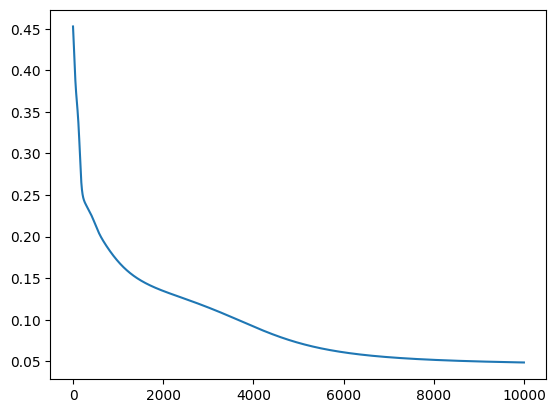

In [48]:
plt.plot(cost)

In [49]:
cost[-1]

np.float64(0.048567525027739006)